<a href="https://colab.research.google.com/github/adheeb4/7PAM2015-0105-2023-Individual-Project/blob/main/Individual_Project_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install fiftyone
!pip install fiftyone-db==0.4.3
!pip install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.2/677.2 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 7.3 MB/s eta 0:00:00
  Installing build dependenci

In [20]:
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
!fiftyone plugins download https://github.com/jacobmarks/fiftyone-albumentations-plugin.git



Copying plugin '@jacobmarks/albumentations_augmentation' to '/root/fiftyone/__plugins__/@jacobmarks/albumentations_augmentation'


In [5]:

dataset_dir = "/content/drive/MyDrive/data"

train_images_dir = "/content/drive/MyDrive/data/validation-300/data"
train_labels_dir = "/content/drive/MyDrive/data/validation-300/labels.json"
validation_images_dir = "/content/drive/MyDrive/data/validation-300/data"
validation_labels_dir ="/content/drive/MyDrive/data/validation-300/labels.json"
test_images_dir = "/content/drive/MyDrive/data/test-30"


dataset_type = fo.types.COCODetectionDataset


train_dataset = fo.Dataset.from_dir(
    data_path=train_images_dir,

    labels_path=train_labels_dir,
    label_field="ground_truth",
    label_types=["detections", "segmentations"],
    name="train1",
    dataset_type = dataset_type,
    include_id=True
)

validation_dataset = fo.Dataset.from_dir(
    data_path=validation_images_dir,
    labels_path=validation_labels_dir,
    label_field="ground_truth",
    label_types=["detections", "segmentations"],
    name="validation1",
    dataset_type = dataset_type,
    include_id=True
)


# Load the test images into a FiftyOne dataset (no annotations)
test_dataset = fo.Dataset.from_dir(
    dataset_dir=test_images_dir,
    name="test1",
    dataset_type=fo.types.ImageDirectory,
    include_id=True
)


 100% |█████████████████| 300/300 [30.4s elapsed, 0s remaining, 16.2 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [30.4s elapsed, 0s remaining, 16.2 samples/s]      


 100% |█████████████████| 300/300 [14.4s elapsed, 0s remaining, 10.4 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [14.4s elapsed, 0s remaining, 10.4 samples/s]      


Ignoring unsupported parameter 'include_id' for importer type <class 'fiftyone.utils.data.importers.ImageDirectoryImporter'>


 100% |███████████████████| 30/30 [108.2ms elapsed, 0s remaining, 277.3 samples/s] 


INFO:eta.core.utils: 100% |███████████████████| 30/30 [108.2ms elapsed, 0s remaining, 277.3 samples/s] 


In [6]:
print(train_dataset)
print(validation_dataset)

Name:        train1
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:       fiftyone.core.fields.IntField
Name:        validation1
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:                         fiftyone.core.fields.ObjectIdField
    filepath:                   fiftyone.core.fields.StringField
    tags:                      

In [41]:
fob.compute_uniqueness(train_dataset)

uniquely_sorted_train_dataset = train_dataset.sort_by("uniqueness")

Computing embeddings...


INFO:fiftyone.brain.internal.core.utils:Computing embeddings...


 100% |█████████████████| 300/300 [13.6s elapsed, 0s remaining, 31.0 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [13.6s elapsed, 0s remaining, 31.0 samples/s]      


Computing uniqueness...


INFO:fiftyone.brain.internal.core.uniqueness:Computing uniqueness...


Uniqueness computation complete


INFO:fiftyone.brain.internal.core.uniqueness:Uniqueness computation complete


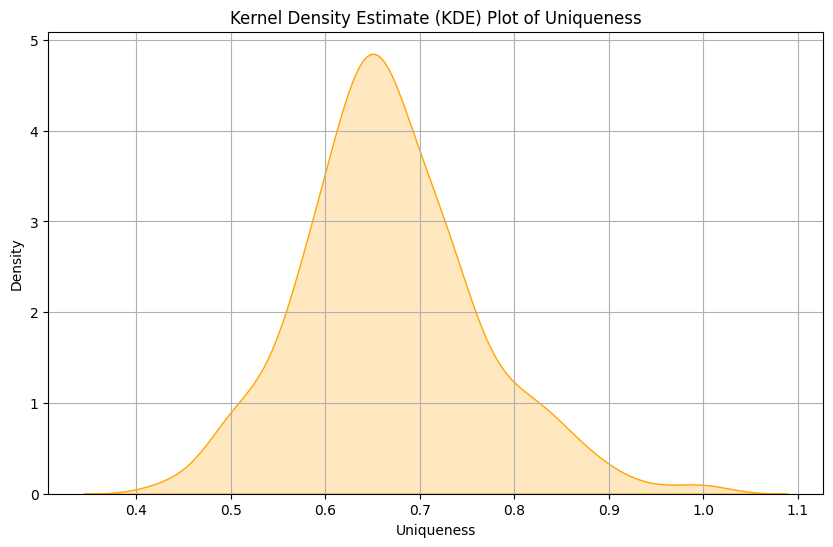

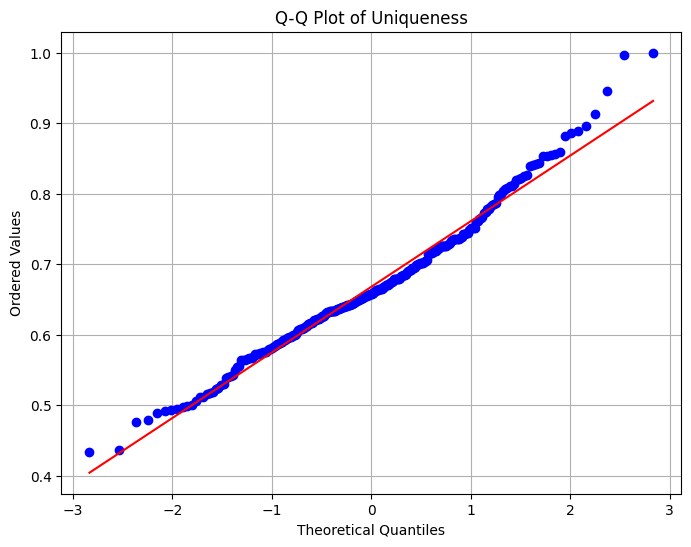

In [52]:
import seaborn as sns

# Kernel Density Estimate (KDE) Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(uniqueness_values, color='orange', fill=True)
plt.xlabel('Uniqueness')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot of Uniqueness')
plt.grid(True)
plt.show()




# Quantile-Quantile (Q-Q) Plot
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(uniqueness_values, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Uniqueness')
plt.grid(True)
plt.show()


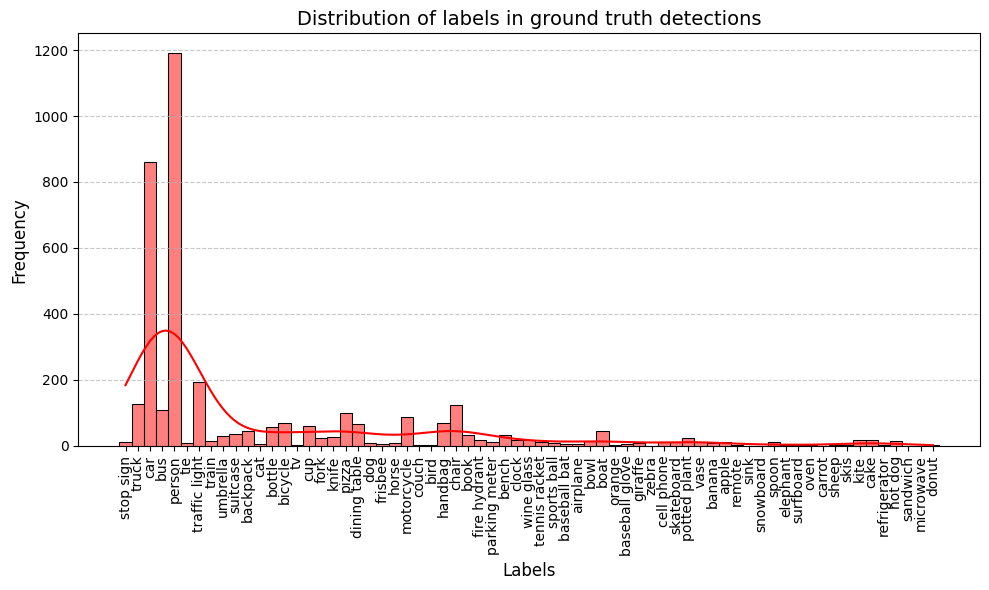

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract labels from the dataset
labels = []
for sample in train_dataset:
    for detection in sample.ground_truth_detections.detections:
        labels.append(detection.label)

# Create a histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(labels, bins=30, kde=True, color='red')  # Change number of bins and color
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of labels in ground truth detections', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [53]:
session = fo.launch_app(train_dataset)

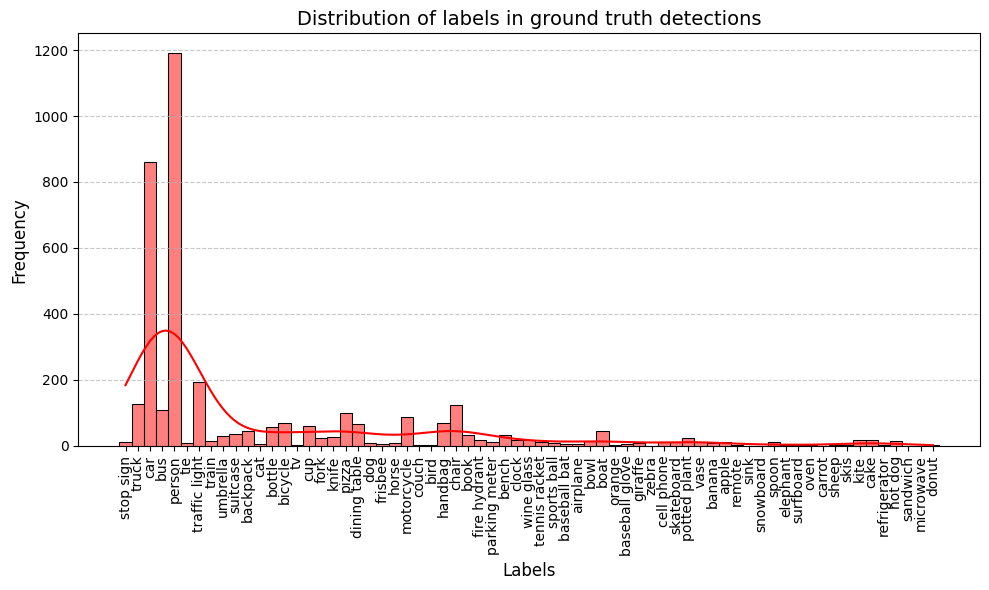

In [55]:
# Initialize variables
num_samples = 0
total_area = 0

# Iterate over the dataset
for sample in train_dataset:
    # Compute number of detections
    num_detections = len(sample.ground_truth_detections.detections)
    sample["metadata"]["num_detections"] = num_detections
    num_samples += 1

    # Compute object sizes statistics
    for detection in sample.ground_truth_detections.detections:
        bbox = detection.bounding_box
        # Bounding box format: [x_min, y_min, width, height]
        width = bbox[2]
        height = bbox[3]
        area = width * height
        total_area += area

# Compute average area
average_area = total_area / num_samples
print("Average area of bounding boxes =", average_area)

In [ ]:
import cv2
import fiftyone as fo
import numpy as np



# Function to resize images and update masks
def resize_and_update_masks(width, height, dataset, resized_dataset):
    # Iterate over the samples in the dataset and resize the images
    for sample in dataset:
        image_path = sample.filepath
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (width, height))

        # Update the sample with the resized image
        sample["image"] = resized_image

        # Update segmentation masks
        masks = []
        for detection in sample.ground_truth_segmentations.detections:
            label = detection.label
            class_mask = detection.mask
            resized_mask = cv2.resize(class_mask.astype(np.uint8), (width, height))

            # Append the resized mask to the list of masks
            masks.append(resized_mask)

        # Update the segmentation masks in the sample
        sample.ground_truth_segmentations.detections.clear()
        for mask in masks:
            detection = fo.Detection(mask=mask, label=label)
            sample.ground_truth_segmentations.detections.append(detection)

        # Update metadata
        sample.metadata["resized"] = True
        sample.metadata["original_width"] = sample.metadata.width
        sample.metadata["original_height"] = sample.metadata.height
        sample.metadata.width = width
        sample.metadata.height = height

        # Add the sample to the resized dataset
        resized_dataset.add_sample(sample)

    return resized_dataset



In [ ]:
resized_train_dataset = fo.Dataset()
resized_validation_dataset = fo.Dataset()
resized_train_dataset = resize_and_update_masks(256, 256, train_dataset, resized_train_dataset)
resized_validation_dataset = resize_and_update_masks(256, 256, validation_dataset, resized_validation_dataset)

In [ ]:
train_images = [sample["image"] for sample in resized_train_dataset]

In [ ]:
validation_images = [sample["image"] for sample in resized_validation_dataset]

In [ ]:
session = fo.launch_app()

In [ ]:
# Initialize an empty list to store masks
train_masks = []

# Iterate over the dataset
for sample in resized_train_dataset:
    # Initialize an empty mask
    mask = np.zeros((sample.metadata['height'], sample.metadata['width']), dtype=np.uint8)
    # Iterate over the segmentation masks
    for detection in sample.ground_truth_segmentations.detections:
        label = detection['label']
        class_mask = detection['mask']
        if label == 'person':
            # Set pixels corresponding to the "person" label to 1
            for i in range(len(class_mask)):
                for j in range(len(class_mask[0])):
                    if class_mask[i][j] == 1:
                        mask[i][j] = 1
                    else:
                        mask[i][j] = 0
        elif label == 'car':
            # Set pixels corresponding to the "car" label to 2
            for i in range(len(class_mask)):
                for j in range(len(class_mask[0])):
                    if class_mask[i][j] == 1:
                        mask[i][j] = 2
                    else:
                        mask[i][j] = 0
        elif label == 'dog':
            # Set pixels corresponding to the "dog" label to 3
            for i in range(len(class_mask)):
                for j in range(len(class_mask[0])):
                    if class_mask[i][j] == 1:
                        mask[i][j] = 3
                    else:
                        mask[i][j] = 0
        elif label == 'cake':
            # Set pixels corresponding to the "cake" label to 4
            for i in range(len(class_mask)):
                for j in range(len(class_mask[0])):
                    if class_mask[i][j] == 1:
                        mask[i][j] = 4
                    else:
                        mask[i][j] = 0

    # Append the mask to the list
    train_masks.append(mask)

In [ ]:
# Initialize an empty list to store masks
validation_masks = []

# Iterate over the dataset
for sample in resized_validation_dataset:
    # Initialize an empty mask
    mask = np.zeros((sample.metadata['height'], sample.metadata['width']), dtype=np.uint8)
    # Iterate over the segmentation masks
    for detection in sample.ground_truth_segmentations.detections:
        label = detection['label']
        class_mask = detection['mask']
        if label == 'person':
            # Set pixels corresponding to the "person" label to 1
            for i in range(len(class_mask)):
                for j in range(len(class_mask[0])):
                    if class_mask[i][j] == 1:
                        mask[i][j] = 1
                    else:
                        mask[i][j] = 0
        elif label == 'car':
            # Set pixels corresponding to the "car" label to 2
            for i in range(len(class_mask)):
                for j in range(len(class_mask[0])):
                    if class_mask[i][j] == 1:
                        mask[i][j] = 2
                    else:
                        mask[i][j] = 0
        elif label == 'dog':
            # Set pixels corresponding to the "dog" label to 3
            for i in range(len(class_mask)):
                for j in range(len(class_mask[0])):
                    if class_mask[i][j] == 1:
                        mask[i][j] = 3
                    else:
                        mask[i][j] = 0
        elif label == 'cake':
            # Set pixels corresponding to the "cake" label to 4
            for i in range(len(class_mask)):
                for j in range(len(class_mask[0])):
                    if class_mask[i][j] == 1:
                        mask[i][j] = 4
                    else:
                        mask[i][j] = 0

    # Append the mask to the list
    validation_masks.append(mask)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Convert lists to TensorFlow Dataset
train_image_dataset = tf.data.Dataset.from_tensor_slices(train_images)
train_mask_dataset = tf.data.Dataset.from_tensor_slices(train_masks)

# Zip the datasets together
train_dataset = tf.data.Dataset.zip((train_image_dataset, train_mask_dataset))

# Convert lists to TensorFlow Dataset
validation_image_dataset = tf.data.Dataset.from_tensor_slices(validation_images)
validation_mask_dataset = tf.data.Dataset.from_tensor_slices(validation_masks)

# Zip the datasets together
validation_dataset = tf.data.Dataset.zip((validation_image_dataset, validation_mask_dataset))

# Shuffle and batch the dataset
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size)
validation_dataset = validation_dataset.shuffle(buffer_size=1000).batch(batch_size)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the U-Net architecture
def unet_segmentation(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    # Decoder
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    up1 = layers.UpSampling2D(size=(2, 2))(conv2)

    # Output layer for segmentation mask
    outputs = layers.Conv2D(num_classes, 1, activation='softmax', padding='same')(up1)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Define custom loss function
def custom_loss(y_true, y_pred):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

# Modify input shape and number of classes
input_shape = (256, 256, 3)  # Example input shape, adjust as needed
num_classes = 4  # Number of output classes (person, car, cake, dog)

# Create the model
model = unet_segmentation(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

# Now, train the model using the dataset
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

# Print history to debug
print(history.history)



Epoch 1/10
10/10 [==============================] - 6s 386ms/step - loss: nan - accuracy: 0.7485 - val_loss: nan - val_accuracy: 0.7515
Epoch 2/10
10/10 [==============================] - 4s 374ms/step - loss: nan - accuracy: 0.7515 - val_loss: nan - val_accuracy: 0.7515
Epoch 3/10
10/10 [==============================] - 4s 371ms/step - loss: nan - accuracy: 0.7515 - val_loss: nan - val_accuracy: 0.7515
Epoch 4/10
10/10 [==============================] - 4s 373ms/step - loss: nan - accuracy: 0.7515 - val_loss: nan - val_accuracy: 0.7515
Epoch 5/10
10/10 [==============================] - 4s 376ms/step - loss: nan - accuracy: 0.7515 - val_loss: nan - val_accuracy: 0.7515
Epoch 6/10
10/10 [==============================] - 4s 375ms/step - loss: nan - accuracy: 0.7515 - val_loss: nan - val_accuracy: 0.7515
Epoch 7/10
10/10 [==============================] - 4s 375ms/step - loss: nan - accuracy: 0.7515 - val_loss: nan - val_accuracy: 0.7515
Epoch 8/10
10/10 [==============================

In [ ]:
model.save("/content/drive/MyDrive/data/test-30/your_trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define your custom loss function
def custom_loss(y_true, y_pred):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

# Load your trained model, providing the custom_loss function
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/data/test-30/your_trained_model.h5",
    custom_objects={"custom_loss": custom_loss}
)

# Now you should be able to load the model successfully


# Load your test dataset
# Assuming you have a function load_test_dataset() to load your test dataset
def load_test_dataset(data_dir):
    # Implement the logic to load your test dataset here
    # Assuming you have functions to load images and their corresponding ground truth masks
    # Replace these with actual code to load your dataset

    X_test = ...  # Load test images
    y_true = ...  # Load ground truth masks

    return X_test, y_true

# Load your test dataset
X_test, y_true = load_test_dataset("/content/drive/MyDrive/data/test-30")  # X_test contains images, y_true contains ground truth masks

# Perform inference to get predictions
predictions = model.predict(X_test)

# Now you can use the predictions for evaluation or further analysis

# Perform inference to get predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=-1)

# Flatten the arrays for computing evaluation metrics
y_true_flat = y_true.flatten()
y_pred_flat = y_pred_labels.flatten()

# Compute evaluation metrics
accuracy = accuracy_score(y_true_flat, y_pred_flat)
precision = precision_score(y_true_flat, y_pred_flat, average='weighted')
recall = recall_score(y_true_flat, y_pred_flat, average='weighted')
f1 = f1_score(y_true_flat, y_pred_flat, average='weighted')
conf_matrix = confusion_matrix(y_true_flat, y_pred_flat)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


NameError: name 'load_test_dataset' is not defined

In [ ]:
print(images)

In [ ]:
none_indices = [i for i, img in enumerate(images) if img is None]
print("Indices of None values in images:", none_indices)


In [ ]:
print(b_boxes_array)

In [ ]:
auto_model = ak.AutoModel(
    inputs=ak.ImageInput(),
    outputs="segmentation",
    max_trials=10,
)
auto_model.fit(x_train, y_train, validation_data=(x_val, y_val))
"""
# Evaluate the trained model on your test dataset
# (Assuming you have test data for evaluation)
x_test = ...  # Extract test images
y_test = ...  # Extract ground truth segmentation masks
results = auto_model.evaluate(x_test, y_test)

# Visualize the results in FiftyOne
session = fo.launch_app(dataset)
session.view(dataset=dataset, eval_key="auto_ml_results")
"""

In [ ]:

# Define and train an AutoKeras image segmentation model
clf = ak.SegmentationHead()
auto_model = ak.AutoModel(inputs=ak.ImageInput(), outputs=clf, max_trials=10)
auto_model.fit(x_train, y_train)

# Evaluate the trained model on your dataset
# (Assuming you have test data for evaluation)
x_test = ...  # Extract test images
y_test = ...  # Extract ground truth segmentation masks
results = auto_model.evaluate(x_test, y_test)

# Visualize the results in FiftyOne
session = fo.launch_app(dataset)
session.view(dataset=dataset, eval_key="auto_ml_results")

In [ ]:
num_columns = 4

# Calculate the number of rows required based on the number of samples and number of columns
num_samples = len(resized_dataset)
num_rows = (num_samples + num_columns - 1) // num_columns

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Iterate over the samples in the dataset and visualize the images
for i, sample in enumerate(resized_dataset):
    # Calculate the row and column index for the subplot
    row_index = i // num_columns
    col_index = i % num_columns

    # Load and display the image
    image = sample["image"]
    axes[row_index, col_index].imshow(image)
    axes[row_index, col_index].axis("off")

    # Set the title as the sample ID
    axes[row_index, col_index].set_title(sample.id)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Access file paths of images
filepaths = [sample.filepath for sample in train_dataset]

# Get image dimensions
image_sizes = []
for filepath in filepaths:
    # Load image and get dimensions
    image = plt.imread(filepath)
    if len(image.shape) == 2:  # Grayscale image
        height, width = image.shape
    else:  # Color image
        height, width, _ = image.shape
    image_sizes.append((width, height))

# Convert to numpy array for easier manipulation
image_sizes = np.array(image_sizes)

# Plot KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=image_sizes[:, 0], label="Width", fill=True)
sns.kdeplot(data=image_sizes[:, 1], label="Height", fill=True)

# Set plot labels and title
plt.xlabel("Image Dimension")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) of Image Size Distribution")

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:


def preprocess(sample, resize_shape=(256, 256)):
  image_data = cv2.imread(sample.filepath)
  binary_mask = np.zeros(image_data.shape[:2], dtype=np.uint8)

  detections = sample["detections"]
  if detections is not None:
    for detection in detections.values():
      for seg in detection.segmentation:
        cv2.fillPoly(binary_mask, [np.array(seg)], 255)
  #for seg in sample.mask.ground_truth.segmentation:
   # cv2.fillPoly(binary_mask, np.array(seg), 255)
  if resize_shape:
    image_data = cv2.resize(image_data, resize_shape)
    binary_mask = cv2.resize(binary_mask, resize_shape, interpolation=cv2.INTER_NEAREST)

  image_data = image_data / 255.0

  return image_data, binary_mask


preprocessed_images = []
preprocessed_masks = []

for sample in dataset:
 # image = sample["image"]
#mask = sample["ground_truth"]

  preprocessed_image, preprocessed_mask = preprocess(sample)

  preprocessed_images.append(preprocessed_image)
  preprocessed_masks.append(preprocessed_mask)
